## Gradient Boosting

## What is Gradient Boosting?
Gradient Boosting is an ensemble techique where we combine multiple weak models to form a stronger model. 

## How Gradient Boosting works?
- Initial Model
- Compute Residual
- Fit a New Model
- Add the new model
- Repeat

In [1]:
# Libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

In [2]:
import warnings
from pandas.errors import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

In [4]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


DEPRECATION: Loading egg at c:\users\dell\miniconda3\lib\site-packages\ibapi-10.30.1-py3.12.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330


In [5]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
heart_disease = fetch_ucirepo(id=45) 
  
# data (as pandas dataframes) 
X = heart_disease.data.features 
y = heart_disease.data.targets 
  
# # metadata 
# print(heart_disease.metadata) 
  
# # variable information 
# print(heart_disease.variables) 


In [6]:
column_names = ["Age", "Sex", "ChestPainType", "RestingBP", "Cholesterol", "FastingBS", "MaxHR", "ExerciseAngina", "Oldpeak", "Slope", "Ca", "Thalassemia", "Target"]

X.columns = column_names
X

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,Slope,Ca,Thalassemia,Target
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0
299,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0
300,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0
301,57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0


In [7]:
# Check for missing values
print(X.isnull().sum())

# Encoding categorical variables (ChestPainType, ExerciseAngina, Thalassemia)
X['ChestPainType'] = X['ChestPainType'].map({0: 'typical', 1: 'atypical', 2: 'nonanginal', 3: 'asymptomatic'})
X['ExerciseAngina'] = X['ExerciseAngina'].map({0: 'no', 1: 'yes'})
X['Thalassemia'] = X['Thalassemia'].map({3: 'normal', 6: 'fixed defect', 7: 'reversible defect'})

# Convert categorical variables to numeric using pd.get_dummies
X = pd.get_dummies(X, drop_first=True)

# Split the dataset into features (X) and target (y)
X = X.drop(columns='Target')
# y = df['Target']

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
Slope             0
Ca                0
Thalassemia       4
Target            2
dtype: int64


In [8]:
X.shape, y.shape

((303, 11), (303, 1))

In [9]:
# Split data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

In [10]:
# Model

gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=.05, max_depth=3)
gb_model.fit(X_train, y_train.values.ravel())

GradientBoostingClassifier(learning_rate=0.05)

In [11]:
# Predict 
y_pred = gb_model.predict(X_test)

In [12]:
# Evaluate
accuracy= accuracy_score(y_test, y_pred)
accuracy

0.4945054945054945

In [13]:
# Visualize the learning rate

train_errors, test_errors = [], []
for n_estimators in range(1, 101):
    model = GradientBoostingClassifier(n_estimators=n_estimators, learning_rate=.025, max_depth=3)
    model.fit(X_train, y_train.values.ravel())
    train_errors.append(1-model.score(X_train, y_train.values.ravel()))
    test_errors.append(1-model.score(X_test, y_test.values.ravel()))

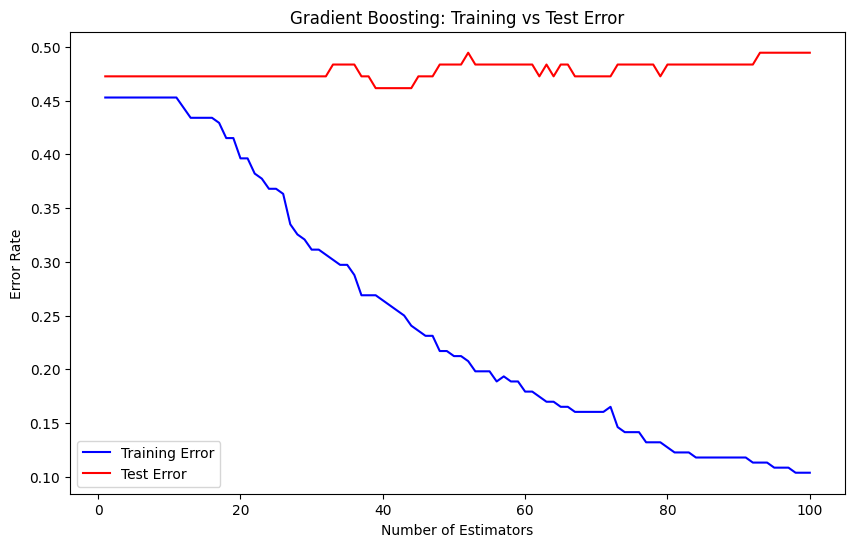

In [14]:
# Plot the error rates
plt.figure(figsize=(10, 6))
plt.plot(range(1, 101), train_errors, label="Training Error", color='blue')
plt.plot(range(1, 101), test_errors, label="Test Error", color='red')
plt.title("Gradient Boosting: Training vs Test Error")
plt.xlabel("Number of Estimators")
plt.ylabel("Error Rate")
plt.legend()
plt.show()